**LOAD ALL NECESSARY LIBRARIES**

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier



**LOADING DATASET**

In [326]:
# Load the dataset
data = pd.read_csv("/content/Car Data.csv")


**DATASET VIEW**

In [327]:
data

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
0,1,Toyota,Camry,2018,White,45000,18000,Los Angeles
1,2,Honda,Civic,2019,Blue,35000,16000,New York
2,3,Ford,Focus,2017,Silver,55000,14000,Chicago
3,4,Chevrolet,Cruze,2016,Red,60000,12000,Miami
4,5,Hyundai,Elantra,2018,Black,40000,15000,San Francisco
...,...,...,...,...,...,...,...,...
1995,1996,Hyundai,Palisade,2019,Silver,65000,22000,San Francisco
1996,1997,Toyota,Sienna,2018,Red,55000,16000,Dallas
1997,1998,Honda,Fit,2018,Gray,50000,14000,Atlanta
1998,1999,Ford,Fusion,2017,White,55000,19000,Phoenix


In [328]:
data.info

<bound method DataFrame.info of       Car ID      Brand     Model  Year   Color  Mileage  Price       Location
0          1     Toyota     Camry  2018   White    45000  18000    Los Angeles
1          2      Honda     Civic  2019    Blue    35000  16000       New York
2          3       Ford     Focus  2017  Silver    55000  14000        Chicago
3          4  Chevrolet     Cruze  2016     Red    60000  12000          Miami
4          5    Hyundai   Elantra  2018   Black    40000  15000  San Francisco
...      ...        ...       ...   ...     ...      ...    ...            ...
1995    1996    Hyundai  Palisade  2019  Silver    65000  22000  San Francisco
1996    1997     Toyota    Sienna  2018     Red    55000  16000         Dallas
1997    1998      Honda       Fit  2018    Gray    50000  14000        Atlanta
1998    1999       Ford    Fusion  2017   White    55000  19000        Phoenix
1999    2000  Chevrolet    Malibu  2016    Blue    30000  23000        Houston

[2000 rows x 8 columns]>

In [329]:
data.describe()

,Car ID,Year,Mileage,Price
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2017.454500,47452.500000,19605.000000
std,577.494589,1.704812,11016.279906,4777.592249
min,1.000000,2015.000000,25000.000000,12000.000000
25%,500.750000,2016.000000,40000.000000,16000.000000
50%,1000.500000,2017.000000,50000.000000,19000.000000
75%,1500.250000,2019.000000,55000.000000,23000.000000
max,2000.000000,2020.000000,70000.000000,29000.000000


In [330]:
data["Brand"].value_counts()

Toyota       438
Honda        411
Ford         384
Chevrolet    384
Hyundai      383
Name: Brand, dtype: int64

**ROWS AND COLUMNS OF THE DATASET**

In [331]:
data.shape

(2000, 8)

**CONVERT CATEGORICAL VARIABLES INTO NUMERIC FROM THE DATASET**

In [332]:

categorical_features = ['Car ID', 'Brand', 'Model', 'Year', 'Price', 'Mileage','Color','Location']

**USING LABEL ENCODER TO CONVERT THE CATEGORICAL VARIABLES**

In [333]:
label_encoder = LabelEncoder()
data[categorical_features] = data[categorical_features].apply(lambda col: label_encoder.fit_transform(col))

**ADJUST THE THRESHOLD AND HANDLE CLASS IMBALANCE USING smote**

In [334]:
threshold = 1
data['Price_class'] = np.where(data['Price'] > threshold, 1, 0)

**CHECK CLASS DISTRIBUTION**

In [335]:
class_distribution = data['Brand'].value_counts()
print("Class Distribution:")
print(class_distribution)


Class Distribution:
4    438
2    411
1    384
0    384
3    383
Name: Brand, dtype: int64


**EXTRACT TARGET VARIABLE**

In [336]:
y = data['Price_class']

**EXTRACT FEATURES AND DROP THE TARGET VARIABLE**

In [337]:
X = data.drop(columns=['Price', 'Price_class'])

**SPLIT DATA INTO TRAIN AND TEST SETS**

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**REMOVE 'Location' COLUMN**

In [339]:
X_train_no_date = X_train.drop('Location', axis=1)
X_test_no_date = X_test.drop('Location', axis=1)

**USE SIMPLE IMPUTER TO FILL ALL THE EMPTY PLACES AS MEAN OR MEDIAN AND FIT THE IMPUTER TO X AND USING SMOTE FIT THE resampled x_TRAIN AND y_TRAIN**

In [340]:

imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well
X_train_imputed = imputer.fit_transform(X_train_no_date)


**DEFINE TRANSFORMERS FOR PREPROCESSING**

In [341]:
numerical_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['int64']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

**COMBINE TRANSFORMERS USING COLUMN TRANSFORMERS**

In [342]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


**DEFINE MODELS FOR CALCULATING ACCURACY SEPERATELY**

In [351]:
models = [
    ('LR', LogisticRegression()),
    ('gbc', GradientBoostingClassifier())
]

**ACCURACY FOR EACH MODELS**

In [352]:
accuracy_scores = []
for name, model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_no_date)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Model: {name}, Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Model: LR, Accuracy: 0.6575
Model: gbc, Accuracy: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


# ***`ENSEMBLE LEARNING MODEL`***

**DEFINE THE ENSEMBLE MODELS**


In [345]:
models = [('logistic_regression', LogisticRegression(random_state=42)),
          ('gradient_boosting', GradientBoostingClassifier(random_state=42))]

**CREATE A VOTING CLASSIFIER**

In [346]:
voting_classifier = VotingClassifier(models, voting='soft')

**BUILD INDIVIDUAL MODELS**

In [347]:
logistic_regression = LogisticRegression(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

**BUILD ENSEMBLE MODEL**

In [348]:
ensemble_model = VotingClassifier(
    estimators=[('lr', logistic_regression), ('gb', gradient_boosting)],
    voting='soft'  # 'soft' for probabilities voting
)

**BUILD THE PIPELINE**

In [349]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('ensemble', ensemble_model)])

**TRAIN THE MODEL**

In [350]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=-1,
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Car ID', 'Brand', 'Model', 'Year', 'Color', 'Mileage', 'Location'], dtype='object'))])),
                ('ensemble',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(random_state=42)),
                                              ('gb',
                                               GradientBoostingClassifier(random_state=42))],
                                  voting='soft'))])

**MAKE PREDICTIONS ON THE TEST SET**

In [353]:
y_pred_ensemble = pipeline.predict(X_test)

**ENSEMBLE MODEL ACCURACY**

In [354]:
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble}")

Ensemble Model Accuracy: 0.84


**EVALUATION METRICES**

In [355]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_pred))
print("Precision Score:")
print(precision_score(y_test, y_pred))
print("Recall Score:")
print(recall_score(y_test, y_pred))
print("F1-Score:")
print(f1_score(y_test, y_pred))
print(f"Ensemble Model Accuracy: {accuracy_ensemble}")

Confusion Matrix:
[[ 22  41]
 [ 23 314]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.35      0.41        63
           1       0.88      0.93      0.91       337

    accuracy                           0.84       400
   macro avg       0.69      0.64      0.66       400
weighted avg       0.82      0.84      0.83       400

ROC-AUC Score:
0.6404785455230559
Precision Score:
0.8845070422535212
Recall Score:
0.9317507418397626
F1-Score:
0.907514450867052
Ensemble Model Accuracy: 0.84


**VISULIZATION OF YEAR AND PRICE**

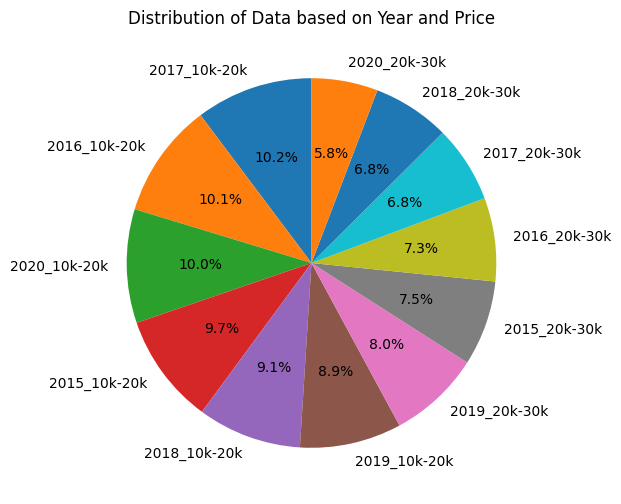

In [305]:
# Define the categories based on 'Year' and 'Price'
year_categories = data['Year'].unique()
price_categories = pd.cut(data['Price'], bins=[0, 10000, 20000, 30000, np.inf], labels=['<10k', '10k-20k', '20k-30k', '30k+'])

# Create a new column combining 'Year' and 'Price' categories
data['Combined_Category'] = data['Year'].astype(str) + '_' + price_categories.astype(str)

# Calculate the proportions for each combined category
category_proportions = data['Combined_Category'].value_counts(normalize=True)

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(category_proportions, labels=category_proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Data based on Year and Price')
plt.show()

**VISUALIZATION FOR BRAND AND YEAR USING PRICE**

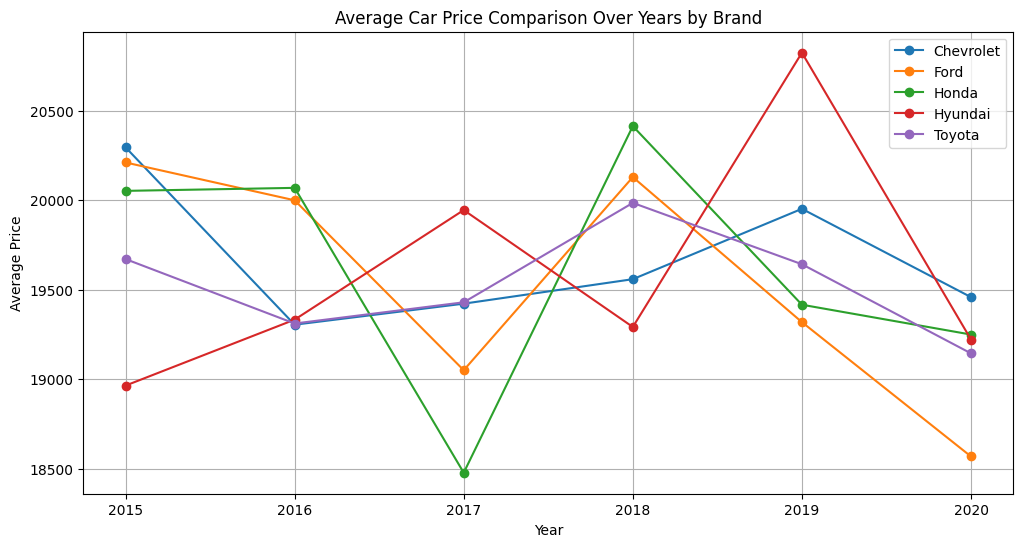

In [316]:
# Group data by 'Brand' and 'Year' and calculate the average price
brand_year_prices = data.groupby(['Brand', 'Year'])['Price'].mean().reset_index()

# Create a line graph for each brand
plt.figure(figsize=(12, 6))

brands = brand_year_prices['Brand'].unique()
for brand in brands:
    brand_data = brand_year_prices[brand_year_prices['Brand'] == brand]
    plt.plot(brand_data['Year'], brand_data['Price'], label=brand, marker='o')

plt.title('Average Car Price Comparison Over Years by Brand')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()